In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix,classification_report

In [2]:
#importing the Dataset
df=pd.read_csv("Shill Bidding Dataset.csv")
df.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [3]:
#Exploratory Data Analysis
df.shape

(6321, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.columns

Index(['Record_ID', 'Auction_ID', 'Bidder_ID', 'Bidder_Tendency',
       'Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding',
       'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding',
       'Winning_Ratio', 'Auction_Duration', 'Class'],
      dtype='object')

In [7]:
df.describe()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,7535.829457,1241.388230,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,4364.759137,735.770789,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,1.000000,5.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3778.000000,589.000000,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,7591.000000,1246.000000,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,11277.000000,1867.000000,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,15144.000000,2538.000000,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


In [8]:
fraud_data=df[df.Class==1]
n_fraud_data=df[df.Class==0]

In [9]:
df.groupby("Class").mean()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration
Class,,,,,,,,,,,
0,7541.459440,1243.419412,0.122403,0.101775,0.016649,0.450286,0.227638,0.465605,0.423630,0.308242,4.597060
1,7488.737778,1224.398519,0.310979,0.344268,0.832593,0.570463,0.264797,0.533181,0.489674,0.865322,4.765926


From the above table we can draw folling conclusion

Bidding_Ratio:A Fraud bidder participates more frequently 
    
Successive Outbidding: A fraud bidder successively outbids more 
    
Winning_Ratio: is very high in fraud cases

In [10]:
features=["Bidder_Tendency",
       'Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding',
       'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding',
       'Winning_Ratio', 'Auction_Duration']

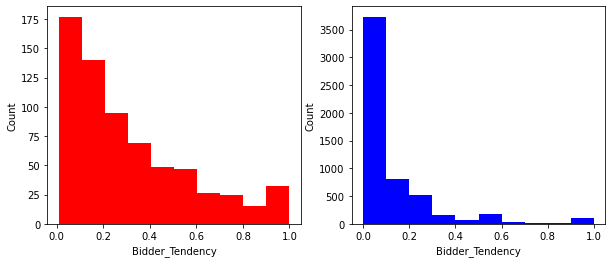

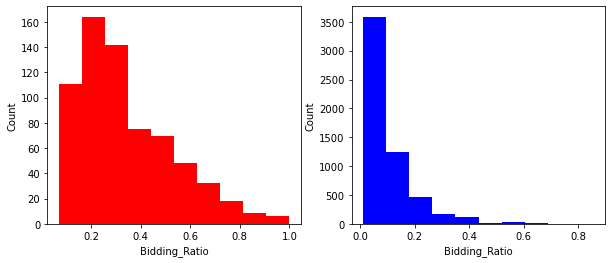

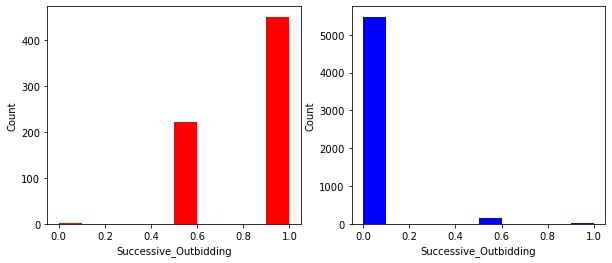

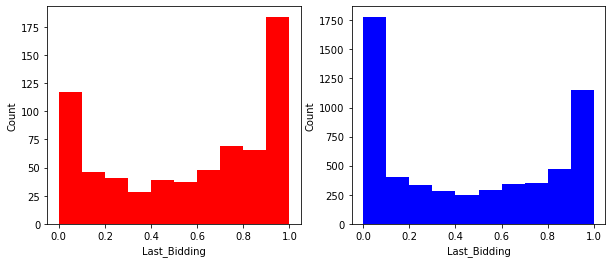

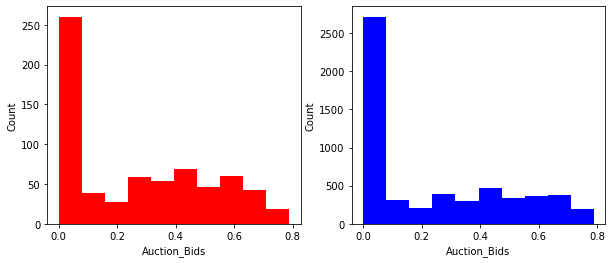

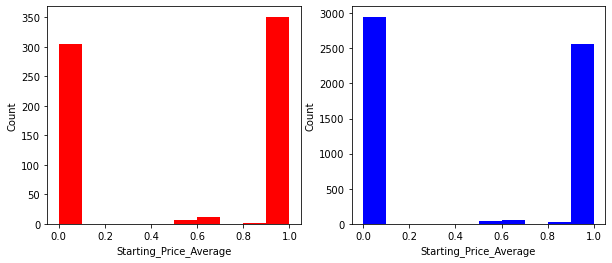

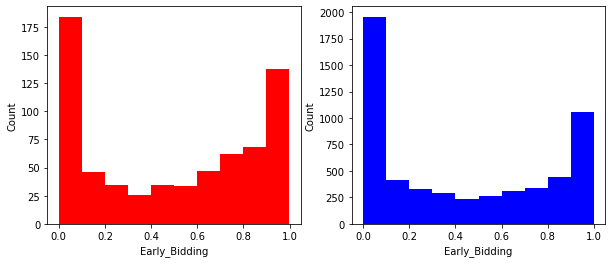

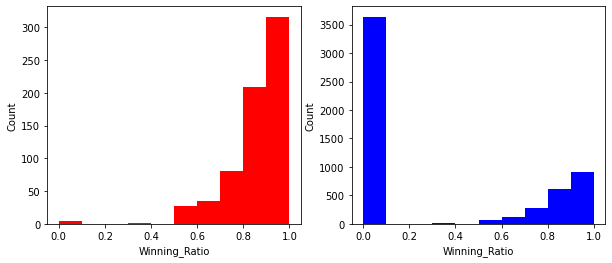

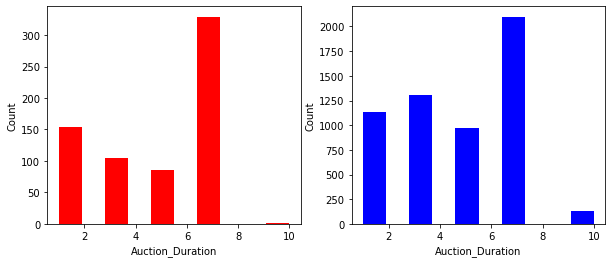

In [11]:
for f in features:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.hist(fraud_data[f],color='red')
    plt.xlabel(f)
    plt.ylabel("Count")
    plt.subplot(1,2,2)
    plt.hist(n_fraud_data[f],color='blue')
    plt.xlabel(f)
    plt.ylabel("Count")
    plt.show()

<AxesSubplot:xlabel='Class', ylabel='count'>

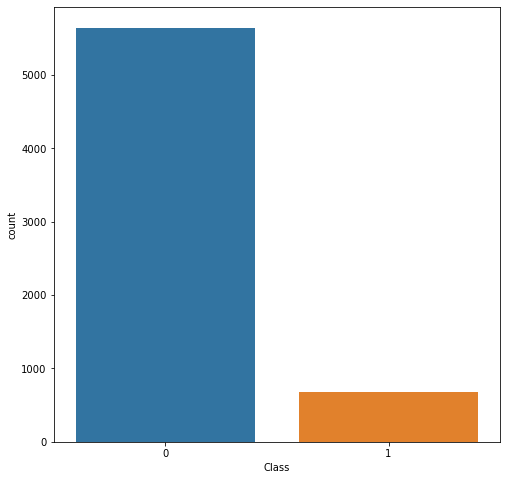

In [12]:
plt.figure(figsize=(8,8))
sns.countplot("Class",data=df)

# Data shows sample imbalance

<AxesSubplot:xlabel='Auction_Duration', ylabel='Density'>

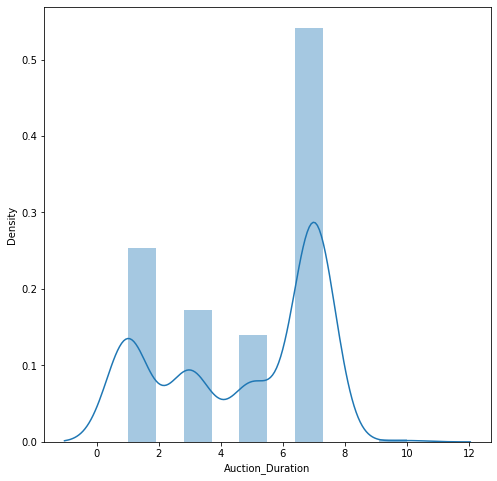

In [13]:
plt.figure(figsize=(8,8))
sns.distplot(fraud_data["Auction_Duration"])

<AxesSubplot:xlabel='Auction_Duration', ylabel='Density'>

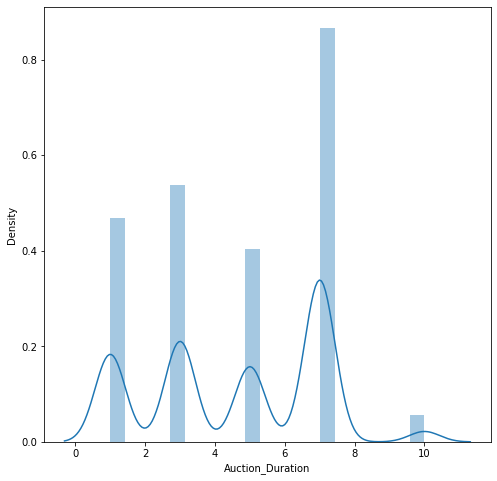

In [14]:
plt.figure(figsize=(8,8))
sns.distplot(n_fraud_data["Auction_Duration"])

<Figure size 576x576 with 0 Axes>

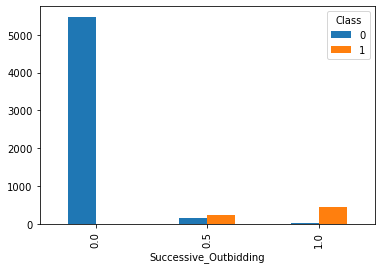

In [15]:
plt.figure(figsize=(8,8))
pd.crosstab(df.Successive_Outbidding,df.Class).plot(kind='bar')
plt.show()

In [16]:
df.corr()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
Record_ID,1.000000,-0.003776,0.011075,-0.040123,0.005271,0.037588,0.048377,0.001265,0.031719,-0.057151,-0.012150,-0.003731
Auction_ID,-0.003776,1.000000,-0.006902,-0.021424,-0.003175,0.070341,0.097558,0.016182,0.068427,-0.039779,0.024918,-0.007985
Bidder_Tendency,0.011075,-0.006902,1.000000,0.293076,0.313510,0.044999,0.086564,0.073242,0.019978,0.212170,0.000244,0.295533
Bidding_Ratio,-0.040123,-0.021424,0.293076,1.000000,0.604828,-0.066541,-0.347831,-0.252289,-0.147773,0.642905,-0.019205,0.569435
Successive_Outbidding,0.005271,-0.003175,0.313510,0.604828,1.000000,0.098941,0.065361,0.052263,0.056798,0.382002,0.010091,0.901035
Last_Bidding,0.037588,0.070341,0.044999,-0.066541,0.098941,1.000000,0.297639,0.293323,0.950096,-0.076726,0.011454,0.097655
Auction_Bids,0.048377,0.097558,0.086564,-0.347831,0.065361,0.297639,1.000000,0.629086,0.298878,-0.381442,0.093331,0.044964
Starting_Price_Average,0.001265,0.016182,0.073242,-0.252289,0.052263,0.293323,0.629086,1.000000,0.302958,-0.262655,0.022990,0.042604
Early_Bidding,0.031719,0.068427,0.019978,-0.147773,0.056798,0.950096,0.298878,0.302958,1.000000,-0.137005,0.011296,0.053570
Winning_Ratio,-0.057151,-0.039779,0.212170,0.642905,0.382002,-0.076726,-0.381442,-0.262655,-0.137005,1.000000,-0.023965,0.394122


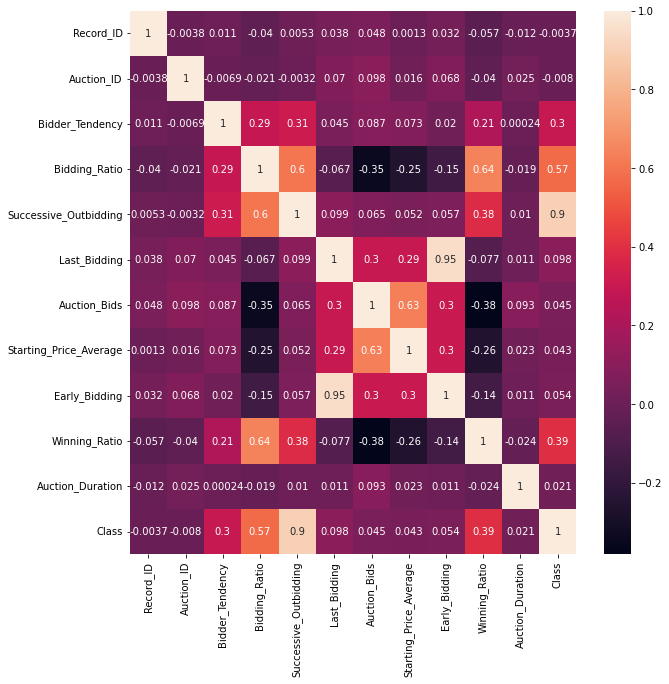

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [18]:
# droping the insignificant features
df.drop(['Record_ID', 'Auction_ID', 'Bidder_ID'],axis=1,inplace=True)

In [19]:
df.sample(8)

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
3698,0.137931,0.117647,0.0,0.506911,0.470588,0.676405,0.506900,0.823529,7,0
824,0.050000,0.045455,0.0,0.013636,0.181818,0.993593,0.013636,0.000000,7,0
1699,0.048780,0.080000,0.0,0.002070,0.280000,0.993593,0.000005,0.000000,7,0
3729,0.090909,0.058824,0.0,0.074403,0.000000,0.993528,0.074403,0.000000,7,0
1398,0.500000,0.105263,0.0,0.878507,0.052632,0.000000,0.645556,1.000000,7,0
2347,0.000000,0.090909,0.0,0.189683,0.000000,0.000000,0.189683,0.000000,7,0
3501,0.130435,0.153846,0.0,0.188438,0.538462,0.993593,0.174491,0.941176,1,0
383,0.035088,0.100000,0.0,0.279074,0.100000,0.000000,0.279065,0.866667,5,0


In [20]:
x=df.drop(["Class"],axis=1)
y=df["Class"]

In [21]:
x.shape

(6321, 9)

In [22]:
y.shape

(6321,)

# checking the sample differences between both the classes

In [23]:
x[df.Class==1].shape

(675, 9)

In [24]:
x[df.Class==0].shape

(5646, 9)

In [25]:
#splitting the train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=0)

In [26]:
#finding the Best Algorithm

models_param={
    'svm':{
        'model':SVC(gamma="auto"),
        'params':{
            'C':[1,10,20],
            "kernel":["rbf","linear"]
        }
    },
    'randomForest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
        }
    },
    'LogesticRegression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    },
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':["gini","entropy"]
        }
    },
    'GaussianNB':{
        'model':GaussianNB(),
        'params':{
            
        }
    },
    'MultinomialNB':{
        'model':MultinomialNB(),
        'params':{
            
        }
    }
    
}


In [27]:
# Finding best model and parms using GridSearchCV
scores=[]

for model_name,mp in models_param.items():
    gscv=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    gscv.fit(x_train,y_train)
    scores.append({'model': model_name,
                  'best_Score':gscv.best_score_,
               'best_param':gscv.best_params_}
    )
df=pd.DataFrame(scores,columns=['model','best_Score','best_param'])
df

,model,best_Score,best_param
0,svm,0.996838,"{'C': 20, 'kernel': 'rbf'}"
1,randomForest,0.988930,{'n_estimators': 10}
2,LogesticRegression,0.981802,{'C': 10}
3,DecisionTreeClassifier,0.993676,{'criterion': 'entropy'}
4,GaussianNB,0.973885,{}
5,MultinomialNB,0.969148,{}


In [28]:
# finding the accuracy of the final model using cross_val_score

print(cross_val_score(DecisionTreeClassifier(criterion='entropy'),x_train,y_train,cv=4))

[0.98417722 0.99050633 0.99683544 1.        ]


In [29]:
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [30]:
dtc.score(x_test,y_test)

0.9976270516116275

In [31]:
y_predict=dtc.predict(x_test)

In [32]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4539
           1       0.99      0.99      0.99       518

    accuracy                           1.00      5057
   macro avg       0.99      0.99      0.99      5057
weighted avg       1.00      1.00      1.00      5057



In [33]:
from imblearn.over_sampling import SMOTE
smote= SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(x,y)

y_sm.value_counts()

0    5646
1    5646
Name: Class, dtype: int64

In [35]:
x_train,x_test,y_train,y_test=train_test_split(X_sm,y_sm,train_size=0.2,random_state=0,stratify=y_sm)

In [36]:
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [37]:
dtc.score(x_test,y_test)

0.9982289129953509

In [38]:
y_predict=dtc.predict(x_test)

In [39]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4517
           1       1.00      1.00      1.00      4517

    accuracy                           1.00      9034
   macro avg       1.00      1.00      1.00      9034
weighted avg       1.00      1.00      1.00      9034



# Perfect model is obtained with Accuracy score 100%